In [157]:
#importing all necessary libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [180]:
#gets the image
path = 'C:/Users/Aizat/Desktop/Computer Vision Work/Quiz2/lego1.png'
img = cv2.imread(path,0) #parameter refers to file name, in grayscale mode.
kernel = np.ones((5,5),np.uint8)



#binarizes the image according to the threshold
ret, thresh = cv2.threshold(img, 150,255,cv2.THRESH_BINARY_INV)

#removes any noise in the background, whilst keeping foreground objects intact. (erosion, dilation)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#required as there was a random pixels that were registered and gave false true reading (refer to Thresholding image - 1 small pixel is shown)


#increases the kernel size to remove any empty spaces within the lego brick
kernel = np.ones((8,8),np.uint8)
#removes any noise within the objects (dilation, erosion)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

#gets the outline via the difference between dilation and erosion of an image
#gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)

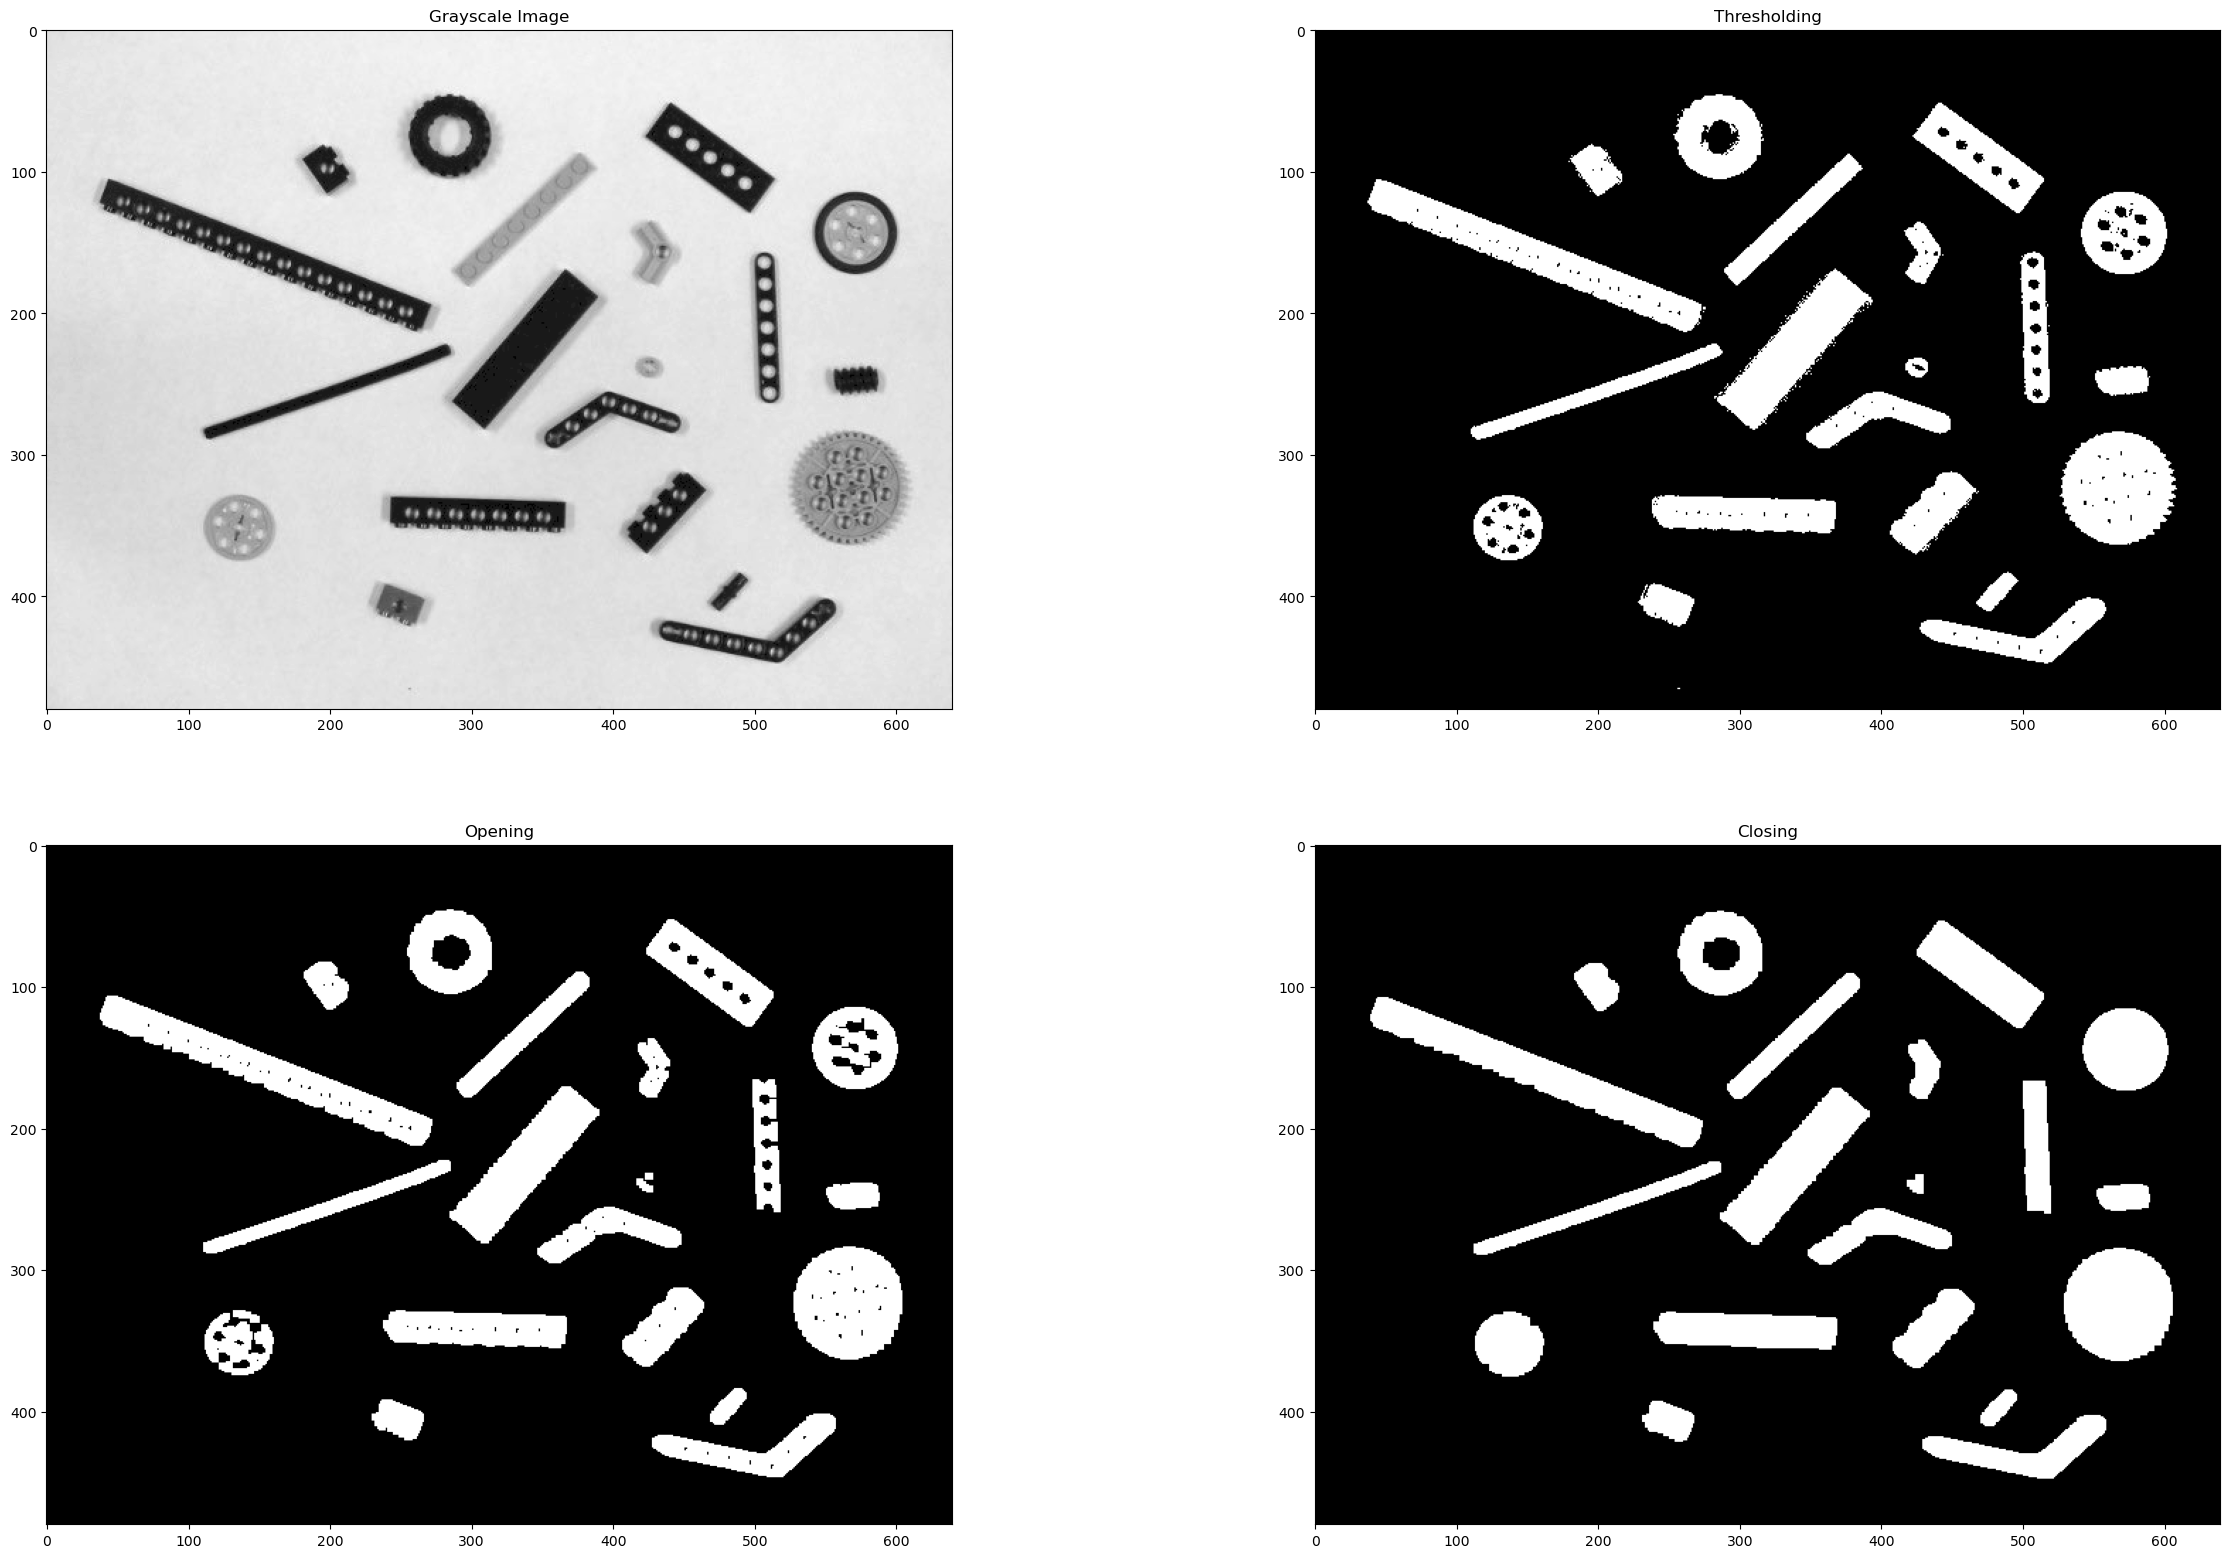

In [181]:
plt.figure(figsize=[30,30])
plt.subplot(321);plt.imshow(img,cmap='gray');plt.title('Grayscale Image');
plt.subplot(322);plt.imshow(thresh,cmap='gray');plt.title('Thresholding');
plt.subplot(323);plt.imshow(opening,cmap='gray');plt.title('Opening');
plt.subplot(324);plt.imshow(closing,cmap='gray');plt.title('Closing');
#plt.subplot(325);plt.imshow(gradient,cmap='gray');plt.title('Gradient');

In [188]:
contours, hierarchy= cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
num = len(contours)

#Parameters:
#1.Source Image
#2.Retrieval Method. only gets the extreme outer contours so it ignores any contours inside
#3.Approximation Method, none, takes all the boundary points stored.


#Counts the only the outside contour lines in the CLOSING Image, thereby ignoring any noise
#in the contour lines.



In [189]:
#Final Answer
print("There are %s Lego Bricks in this Picture" % num )

There are 20 Lego Bricks in this Picture


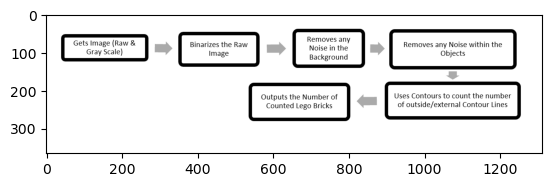

In [190]:
flowchart = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz2/FlowChart.png')
plt.imshow(flowchart)

In [ ]:
'''1. Gets Image (Raw & Converts it to Gray Scale Mode)
    First, we get the image from the selected path and read it in grayscale mode and save it to the program.
    

2. Binarizes the Grayscale Image
    With that Grayscale image, we take each pixel it compares it to the threshold value (155). If the pixel value is less than 155, it will set it to zero (Black), else it will set to the Maximum value 255 (White).
    
3. Removes any Noise in the Background, leaving Objects in the Foreground intact
    There is some Background noise. To remove it we can use Erosion, but I want to keep the borders of the objects intact at this point. Therefore I use Opening Operation Morphology (Erosion and Dilation) on the Binary Image to remove any noise in the background.

4. Removes any Noise in the Objects
    Similiar to above, however we are closing (Dilation then Erosion). This removes any noise within the object.
    
        Erosion - Slides the Kernel through the image. If all the pixels underneath the kernel is 1 (white) it will be eroded set to black.  
        Dilation - Slides the Kernel through the image. A pixel is white if there is at least one pixel under the kernel that is 1.
    
5. Counts the External Contour Lines
    Only the Extreme Outer Contours are counted and each of its boundary points are saved to an Contour Python Numpy Array. The amount of elements in the array indicates how many separate contours are there. So we use len() to count it. 


6. Outputs the Counted Number to the User
    Output the final answer to the user.
'''